# Customer Churn Prediction and Retention Strategies for a Telecommunications Company

## Description

This project aims to identify the key indicators of customer churn for a telecommunications company and develop a model to predict which customers are likely to churn. The project will also provide insights into effective retention strategies that the company can implement to reduce customer churn. The data will be processed and analyzed using various techniques such as data cleaning, bivariate and multivariate analysis, and exploratory data analysis. The best-performing model will be selected and evaluated, and suggestions for model improvement will be provided. The ultimate goal of this project is to help the telecommunications company reduce customer churn and improve customer retention.

## Hypothesis

Clearly stated null and alternate hypotheses are:

# 1.
    
H0: There is no significant difference in churn rates between male and female customers.


H1: There is a significant difference in churn rates between male and female customers.

# 2.
H0: There is no significant relationship between the customer's internet service provider and their likelihood to churn.

    
H1: There is a significant relationship between the customer's internet service provider and their likelihood to churn.




# 3.
H0: There is no significant difference in churn rates between customers on different types of payment methods.

    
H1: There is a significant difference in churn rates between customers on different types of payment methods.


## Questions

Here are five questions that could be answered in this project:

1. What percentage of customers have churned?


2. Is there a correlation between a customer's length of tenure with the company and their likelihood of churning?


3. Are there any specific groups of customers based on demographic that are more likely to churn than others?


4. Can customer retention be improved by offering longer contract terms?


5. How much money could the company save by reducing customer churn?


6. What is the relationship between Internet Services and churn rate?



# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
#!pip3 install --upgrade scikit-learn > /dev/null 2>&1

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np 

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, fbeta_score
from sklearn.metrics import confusion_matrix

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Other packages
from tabulate import tabulate
import os, pickle

import warnings
warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv
df = pd.read_csv(r"Telco-Customer-Churn.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [4]:
# Preview top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Preview bottom 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Preview shape (number of columns and rows)
df.shape

(7043, 21)

In [8]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Check for duplicates
df.duplicated().sum()

0

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

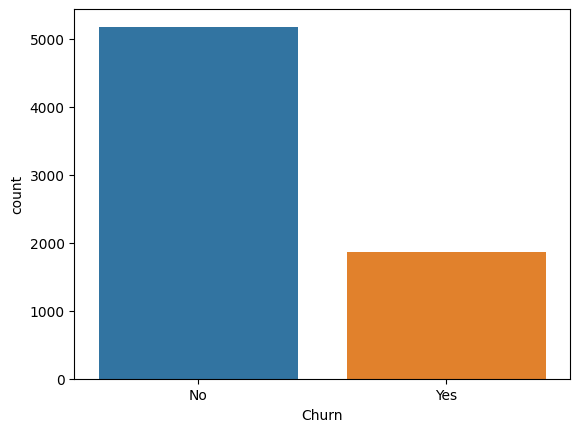

In [11]:
# Plot a histogram of the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.show()

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

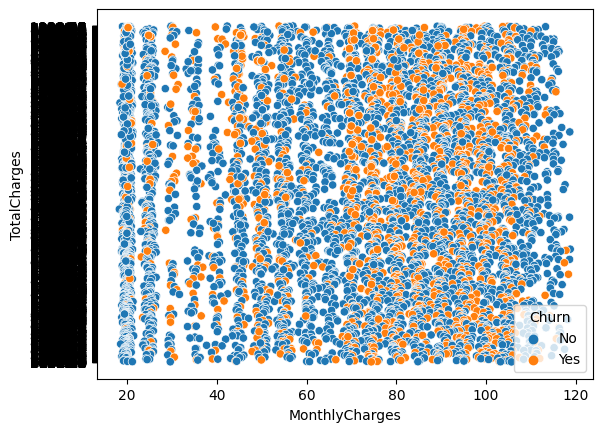

In [12]:
# Plot a scatterplot of monthly charges vs. total charges
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

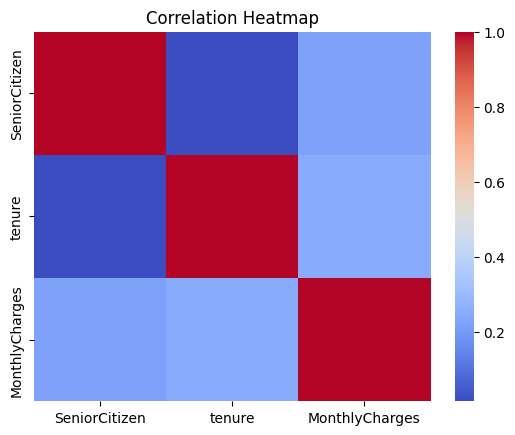

In [13]:
# Correlation Heatmap for numerical columns
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Churn by Gender')

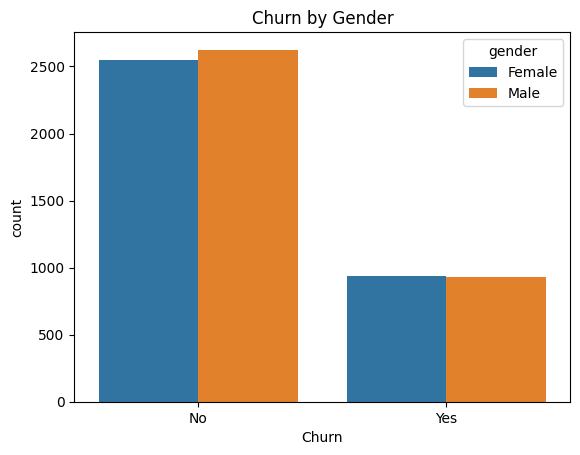

In [14]:
# Count plot showing churn by gender
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Churn by Gender')

Text(0.5, 1.0, 'Churn by Internet Service')

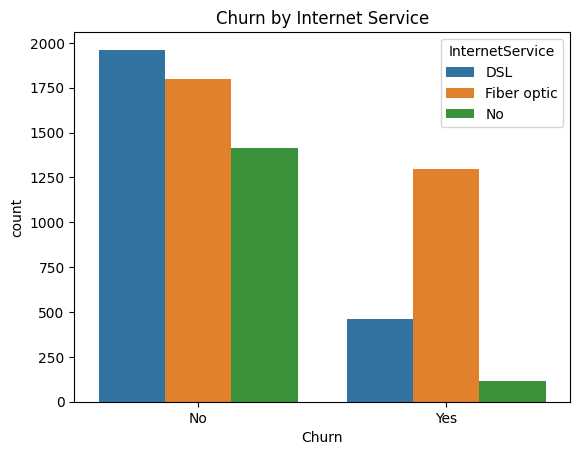

In [15]:
# Create a count plot showing the number of customers who churned
sns.countplot(x='Churn', hue='InternetService', data=df)
plt.title('Churn by Internet Service')

## Answering Questions

### 1. What percentage of customers have churned?

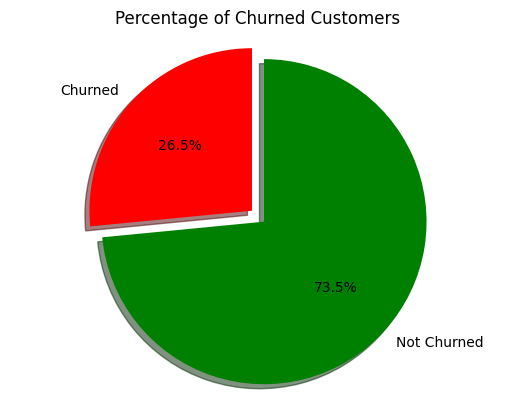

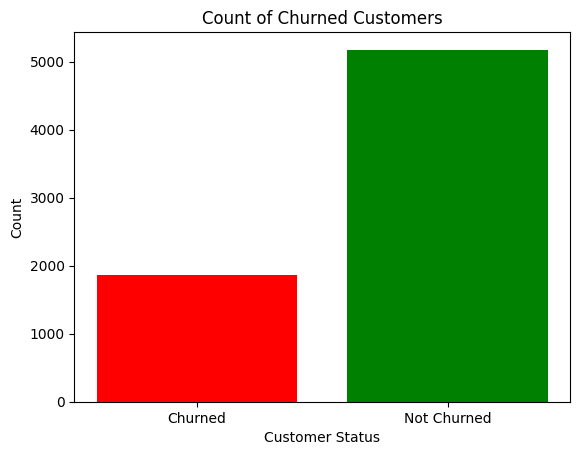

In [16]:
# Calculate the percentage of churned customers
churned = df[df["Churn"] == "Yes"]
percentage_churned = (len(churned) / len(df)) * 100# Plot the percentage of churned customers
labels = ["Churned", "Not Churned"]
sizes = [percentage_churned, 100 - percentage_churned]
colors = ["red", "green"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Percentage of Churned Customers")
plt.show()

# Bar Plot for Count

# Count the number of churned and not churned customers
churned = df[df["Churn"] == "Yes"]
not_churned = df[df["Churn"] == "No"]
count_churned = len(churned)
count_not_churned = len(not_churned)

# Create a bar plot
labels = ["Churned", "Not Churned"]
counts = [count_churned, count_not_churned]
colors = ["red", "green"]
plt.bar(labels, counts, color=colors)

# Add title and labels
plt.title("Count of Churned Customers")
plt.xlabel("Customer Status")
plt.ylabel("Count")

# Display the plot
plt.show()


**Comment**:

##### 1,869 ustomers churned, representing 26.5% compared to 5,174 customers, representing 73.5% who did not churn

# 

### 2. Is there a correlation between a customer's length of tenure with the company and their likelihood of churning?

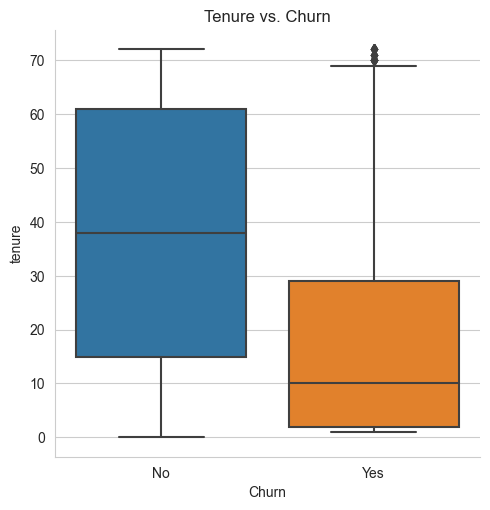

In [17]:
# Box plot showing correlation between tenure and churn
sns.set_style("whitegrid")
sns.catplot(x="Churn", y="tenure", kind="box", data=df)
plt.title("Tenure vs. Churn")
plt.show()

**Comment**:

- The average tenure of customers that did not churn is higher at 38, whiles that of those that churned is lower at 10


- Costomers who did not churn have a normal distribution, whiles customers who churned are positively skewed.


- An outlier was identified within churned customers

### 3. Are there any specific groups of customers based on demographic that are more likely to churn than others?

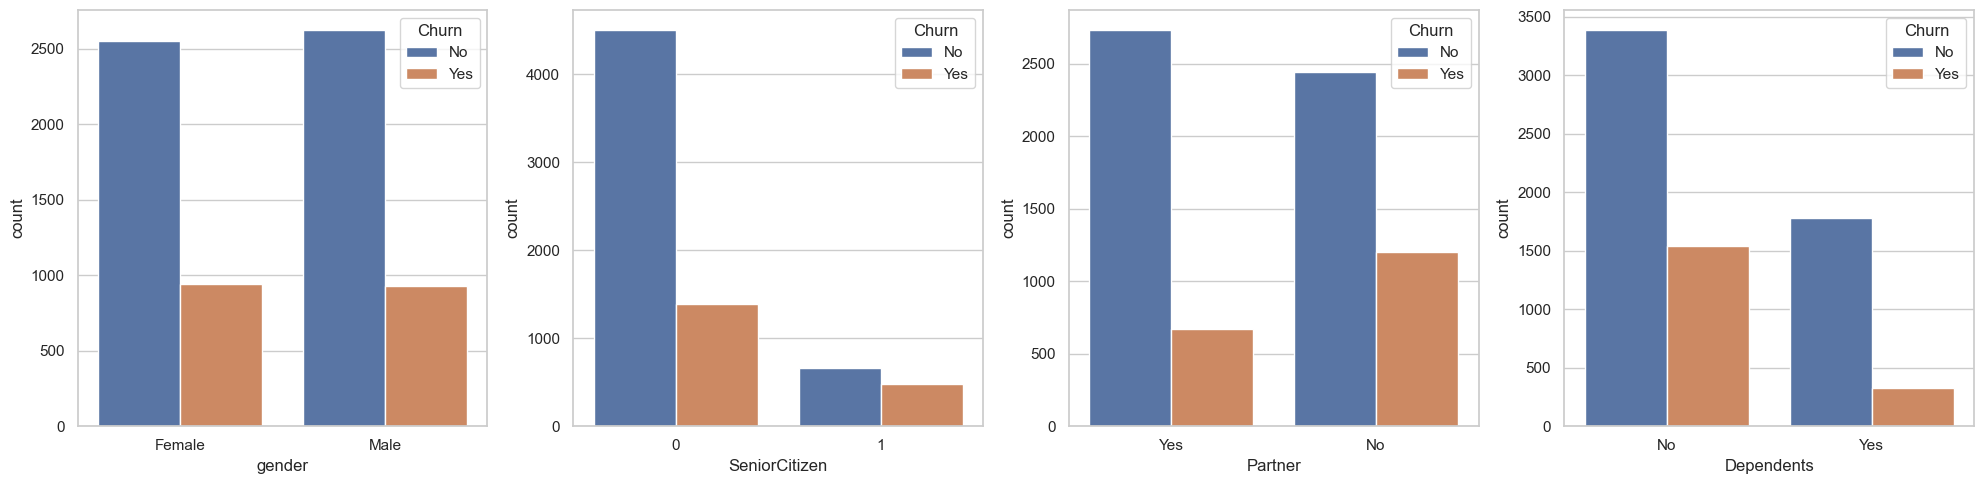

In [18]:
# Set the style of the grid
sns.set(style="whitegrid")

# Create a figure with 1 row and 4 columns
fig, axs = plt.subplots(ncols=4, figsize=(20,5))

# Plot the count of customers by gender with respect to churn status and place it in the first column of the figure
sns.countplot(x="gender", hue="Churn", data=df, ax=axs[0])

# Plot the count of customers by SeniorCitizen status with respect to churn status and place it in the second column of the figure
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=axs[1])

# Plot the count of customers by Partner status with respect to churn status and place it in the third column of the figure
sns.countplot(x="Partner", hue="Churn", data=df, ax=axs[2])

# Plot the count of customers by Dependents status with respect to churn status and place it in the fourth column of the figure
sns.countplot(x="Dependents", hue="Churn", data=df, ax=axs[3])

# Ensure the subplots are properly spaced out
plt.tight_layout()

# Display the figure
plt.show()

**Comment**:


- There is a marginal high churn for females than males


- Senior citizens are less likely to churn compare to non-senior citizens


- Customers without partners are more likely to churn compared to customers with partners


- There is a high rate of churn for customers without dependants as against customers with dependants


### 4. Can customer retention be improved by offering longer contract terms?

[Text(0.5, 1.0, 'Customer Churn by Contract Term'),
 Text(0.5, 0, 'Contract Term'),
 Text(0, 0.5, 'Count')]

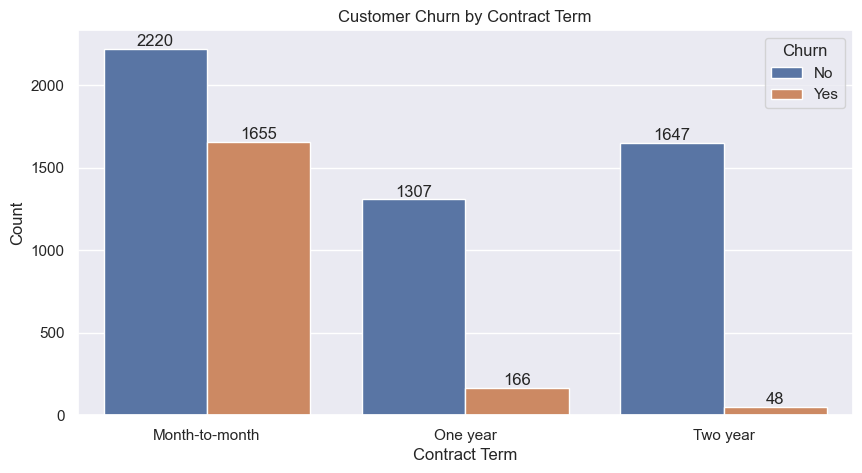

In [19]:
# Set the figure size
sns.set(rc={'figure.figsize':(10,5)})

# Create the countplot with the 'Contract' variable on the x-axis and the 'Churn' variable as the hue
ax = sns.countplot(data=df, x='Contract', hue='Churn')

# Add labels to the bars showing the count of each category
for container in ax.containers:
    ax.bar_label(container)

# Add a title and axis labels
ax.set(title='Customer Churn by Contract Term', xlabel='Contract Term', ylabel='Count')


**Comment**:

- There is a positive correlation between higher contract terms and retention rate


- Customers under two year contract term have a higher renttion rate than the one year and month-to-month contract terms. Whereas those under one year contract term have a higher retention rate than the month-to-month customers


### 5. How much money could the company save by implementing effective retention strategies and reducing customer churn?

In [20]:
# Calculate the current total revenue
current_revenue = df['MonthlyCharges'].sum()

# Calculate the potential total revenue
potential_revenue = (df['MonthlyCharges'].mean() * df['tenure'].mean() * len(df))

# Calculate the amount the company could save
savings = potential_revenue - current_revenue

print(f"Current revenue: ${current_revenue:.2f}")
print(f"Potential revenue: ${potential_revenue:.2f}")
print(f"Savings: ${savings:.2f}")

Current revenue: $456116.60
Potential revenue: $14765018.26
Savings: $14308901.66


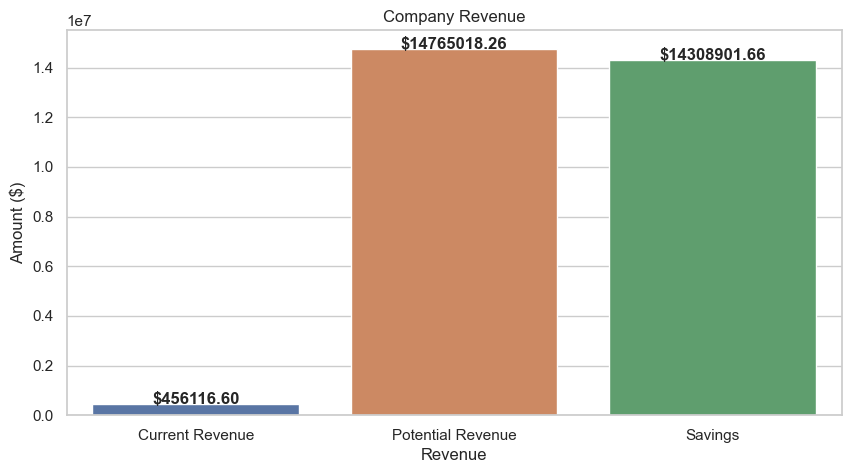

In [21]:
# Define the data
labels = ['Current Revenue', 'Potential Revenue', 'Savings']
values = [current_revenue, potential_revenue, savings]

# Set seaborn style
sns.set_style("whitegrid")

# Create the bar chart
ax = sns.barplot(x=labels, y=values)

# Add labels to each bar
for i in range(len(labels)):
    ax.text(x=i, y=values[i]+50, s=f"${values[i]:.2f}", ha='center', fontweight='bold')

# Add axis labels and title
ax.set(xlabel='Revenue', ylabel='Amount ($)', title='Company Revenue')

# Show the chart
plt.show()

**Comment**:

- The company has a potential to save over $14 million in revenue by adopting effective strategies and reducing churn rates. 
    


### 6. What is the relationship between Internet Services and churn rate?

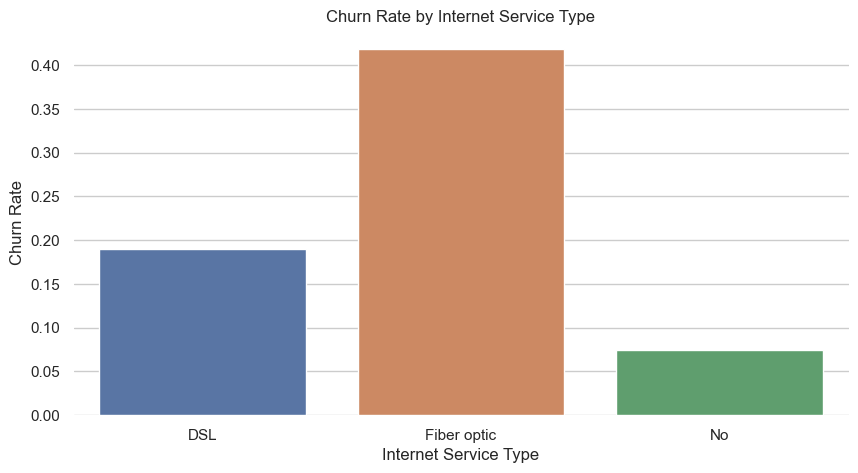

In [22]:
# Calculate the churn rates by internet service type
churn_rates = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index()# Create a bar plot of the churn rates by internet service type using seaborn
sns.barplot(data=churn_rates, x='InternetService', y='Churn')
sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.show()

**Comment:**
    
Churn rates are highest for fiber optic internet service users (over 40%) compared to DSL internet service type users (19%) and customers with No internet service (7.5%).  

## Answering Hypotheses

# 1. 
##### H0: There is no significant difference in churn rates between male and female customers.
##### H1: There is a significant difference in churn rates between male and female customers.

In [23]:
# Calculate the total number of male and female customers
total_male = df['gender'].value_counts()['Male']
total_female = df['gender'].value_counts()['Female']

# Calculate the number of male and female customers who churned
churned_male = df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')].shape[0]
churned_female = df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')].shape[0]

# Calculate the churn rates for male and female customers
churn_rate_male = (churned_male / total_male).round(2)
churn_rate_female = (churned_female / total_female).round(2)

print("Churn rate for male customers:", churn_rate_male)
print("Churn rate for female customers:", churn_rate_female)

Churn rate for male customers: 0.26
Churn rate for female customers: 0.27


In [24]:
# churn rates for male customers
male_churn_rates = 0.2616033755274262

# churn rates for female customers
female_churn_rates = 0.26920871559633025

# perform two-sample t-test with equal variances assumed
t_statistic, p_value = stats.ttest_ind(male_churn_rates, female_churn_rates, equal_var=True)

# print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# compare p-value with alpha (e.g., 0.05) to determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference in churn rates between male and female customers.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in churn rates between male and female customers.")

t-statistic: nan
p-value: nan
Fail to reject null hypothesis. There is no significant difference in churn rates between male and female customers.


# 2.
##### H0: There is no significant relationship between the customer's internet service provider and their likelihood to churn.
##### H1: There is a significant relationship between the customer's internet service provider and their likelihood to churn.

In [25]:
# Converting SeniorCitizen into categorical feature
df.SeniorCitizen.replace(0, "No", inplace = True)
df.SeniorCitizen.replace(1, "Yes", inplace = True)

# Label Encoding target column
df.Churn.replace("No", 0, inplace = True)
df.Churn.replace("Yes", 1, inplace = True)

In [26]:
# Calculate churn rates by internet service provider
churn_rates = df.groupby('InternetService')['Churn'].mean().round(3)

print(churn_rates)

InternetService
DSL            0.190
Fiber optic    0.419
No             0.074
Name: Churn, dtype: float64


In [27]:
# create a contingency table of internet service provider and churn
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

# perform the chi-squared test and print the results
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-squared test results:')
print(f'Chi2 = {chi2:.2f}, p-value = {p_value:.4f}, degrees of freedom = {dof}')
if p_value < 0.05:
    print('Reject null hypothesis: There is a significant relationship between the customer\'s internet service provider and their likelihood to churn.')
else:
    print('Fail to reject null hypothesis: There is no significant relationship between the customer\'s internet service provider and their likelihood to churn.')

Chi-squared test results:
Chi2 = 732.31, p-value = 0.0000, degrees of freedom = 2
Reject null hypothesis: There is a significant relationship between the customer's internet service provider and their likelihood to churn.


# 3.
##### H0: There is no significant difference in churn rates between customers on different types of payment methods.
##### H1: There is a significant difference in churn rates between customers on different types of payment methods.

In [28]:
payment_col = 'PaymentMethod'
churn_col = 'Churn'

# create a contingency table of counts
contingency_table = pd.crosstab(df[payment_col], df[churn_col])

# perform chi-square test of independence
stat, pval, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05  # significance level

# interpret results
print(f"chi-square statistic = {stat:.2f}")
print(f"p-value = {pval:.4f}")
print(f"degrees of freedom = {dof}")
print("Expected counts:")
print(expected)

if pval < alpha:
    print("Reject null hypothesis: there is a significant difference in churn rates between customers on different types of payment methods.")
else:
    print("Fail to reject null hypothesis: there is no significant difference in churn rates between customers on different types of payment methods.")

chi-square statistic = 648.14
p-value = 0.0000
degrees of freedom = 3
Expected counts:
[[1134.26891949  409.73108051]
 [1118.10705665  403.89294335]
 [1737.40025557  627.59974443]
 [1184.22376828  427.77623172]]
Reject null hypothesis: there is a significant difference in churn rates between customers on different types of payment methods.


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [29]:
# drop customerID column
df = df.drop('customerID', axis=1)

In [30]:
target = df['Churn']
train = df.drop(columns = ['Churn'])

In [31]:
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [33]:
train.shape

(7043, 19)

In [34]:
# Define X and y
X = train
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

### Checking Data Imbalance

Proportion of Churned Customers: 0.2653698707936959
Proportion of Not Churned Customers: 0.7346301292063041


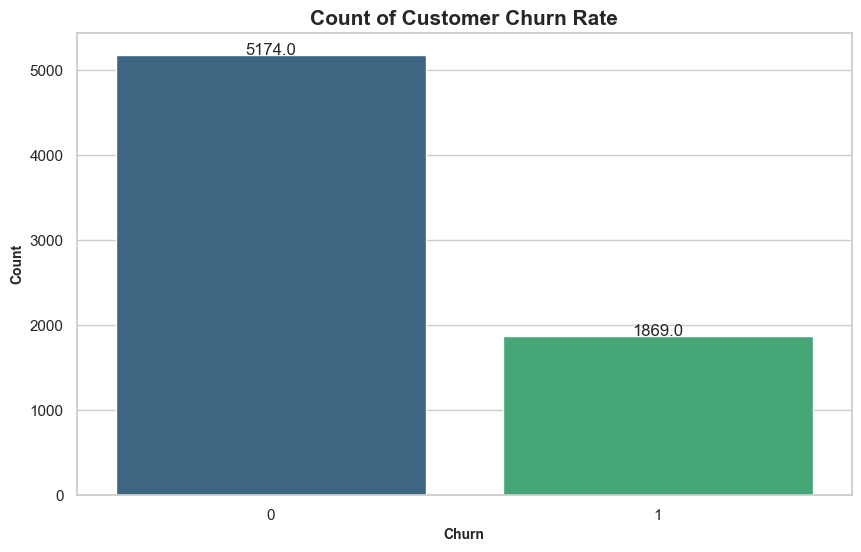

In [36]:
#check for class imbalance
plt.figure(figsize=(10,6))
ch= sns.countplot(data=df,x="Churn",palette='viridis') 
ch.set_title('Count of Customer Churn Rate',fontsize=15,fontweight='bold')
ch.set_xlabel('Churn',fontsize=10,fontweight='bold')
ch.set_ylabel('Count',fontsize=10,fontweight='bold')
for p in ch.patches:
    height = p.get_height()
    ch.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
# calculate proportion of churn categories
#churn_prop = churn_counts / len(df)
#print('Churn class proportions:')
#print(churn_prop)

# Calculate proportion of churn categories
churn_counts = df["Churn"].value_counts()
proportions = churn_counts / len(df)

# Display proportions
print("Proportion of Churned Customers:", proportions[1])
print("Proportion of Not Churned Customers:", proportions[0])


##### Data is imbalance as less people tend to churn (27%)  compared to the number that does not churn (73%)

### Balancing Dataset

In [37]:
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert X_rus and y_rus to a pandas DataFrame
df_ros = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

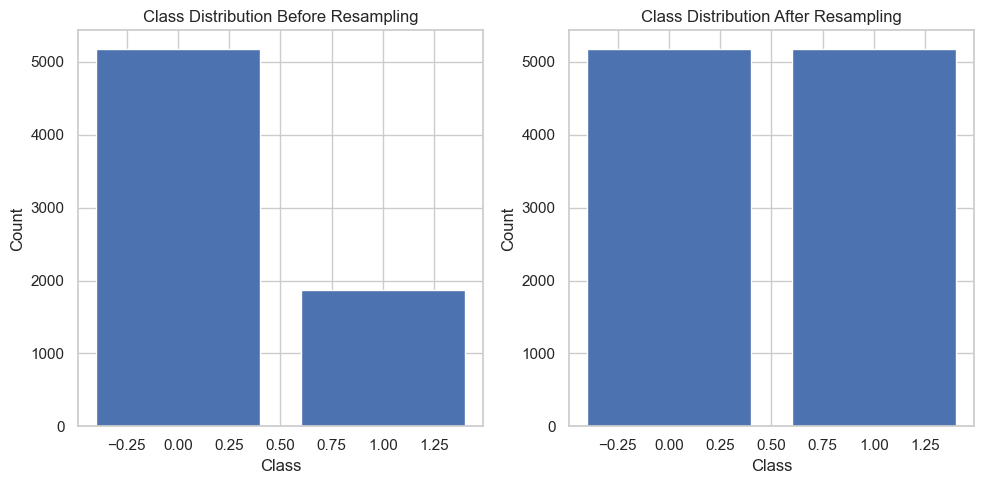

In [38]:
# Plot the target variable distribution before and after resampling
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(y.value_counts().index, y.value_counts().values)
ax[0].set_title("Class Distribution Before Resampling")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")
ax[1].bar(y_resampled.value_counts().index, y_resampled.value_counts().values)
ax[1].set_title("Class Distribution After Resampling")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


**Comment**:


The above chart now shows our data is balanced

In [39]:
# Checking shape of our balanced data
df_ros.shape

(10348, 20)

In [40]:
df_ros.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [41]:
# copy and re-assign df_ros to new_df
new_df = df_ros.copy()
df_ros = new_df


In [42]:
new_df.shape

(10348, 20)

# 

## Impute Missing Values

In [43]:
# Clean TotalCharges  and covert to float before imputing
new_df['TotalCharges'].replace({" " :np.nan}, inplace=True)
new_df['TotalCharges']=new_df['TotalCharges'].astype(float)

In [44]:
# Check for null values in data
null_rows = new_df.loc[new_df["TotalCharges"].isnull()]
null_rows.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0


In [47]:
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

# imputer.fit(new_df['TotalCharges'])

# new_df['TotalCharges'] = imputer.transform(new_df['TotalCharges'])

In [48]:
imputer.fit(new_df['TotalCharges'].values.reshape(-1, 1))
new_df['TotalCharges'] = imputer.transform(new_df['TotalCharges'].values.reshape(-1, 1))

In [49]:
# Recheck for null values
null_rows = new_df.loc[new_df["TotalCharges"].isnull()].values
null_rows

array([], shape=(0, 20), dtype=object)

In [50]:
# Re-Check for data types after conversion
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10348 non-null  object 
 1   SeniorCitizen     10348 non-null  object 
 2   Partner           10348 non-null  object 
 3   Dependents        10348 non-null  object 
 4   tenure            10348 non-null  int64  
 5   PhoneService      10348 non-null  object 
 6   MultipleLines     10348 non-null  object 
 7   InternetService   10348 non-null  object 
 8   OnlineSecurity    10348 non-null  object 
 9   OnlineBackup      10348 non-null  object 
 10  DeviceProtection  10348 non-null  object 
 11  TechSupport       10348 non-null  object 
 12  StreamingTV       10348 non-null  object 
 13  StreamingMovies   10348 non-null  object 
 14  Contract          10348 non-null  object 
 15  PaperlessBilling  10348 non-null  object 
 16  PaymentMethod     10348 non-null  object

## Dataset Splitting

In [51]:
target_df = new_df['Churn']
train_df = new_df.drop(columns = ['Churn'])

In [52]:
target_df.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [53]:
train_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [54]:
# for percent [0; 100] of nan in dataframe
features = train_df.columns
missing_threshold = 50
check = (new_df[features].isna().sum() / ((new_df.shape[0]) / 100))

valid_features = check[check < missing_threshold].index.to_list()
check.sort_values(ascending=False)

gender              0.0
DeviceProtection    0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
SeniorCitizen       0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
TotalCharges        0.0
dtype: float64

In [55]:
# Define X and y
X = train_df
y = target_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7243, 19), (3105, 19), (7243,), (3105,))

## Features Encoding




In [57]:
# encode categorical variable using ordinal encoding
encoder = OrdinalEncoder()
cat_cols = X.select_dtypes(include='object').columns
X_encoded = pd.DataFrame(encoder.fit_transform(X[cat_cols]))
X_encoded.columns = cat_cols

# combine encoded categorical variables with numerical variables
num_cols = X.select_dtypes(include='number').columns
X_processed = pd.concat([X_encoded, X[num_cols]], axis=1)


In [58]:
X_processed.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1,29.85,29.85
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,34,56.95,1889.50
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2,53.85,108.15
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,45,42.30,1840.75
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2,70.70,151.65


In [59]:
X_processed.shape

(10348, 19)

## Features Scaling


In [60]:
# initialize MinMaxScaler object with specified parameters
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# select numerical columns to scale
num_cols = X_processed.select_dtypes(include='number').columns

# scale numerical columns using MinMaxScaler
X_processed[num_cols] = scaler.fit_transform(X_processed[num_cols])


In [61]:
X_processed.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.013889,0.115423,0.001275
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.472222,0.385075,0.215867
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.027778,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.625000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.027778,0.521891,0.015330


# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each other.

In [62]:
#Split dataset on data after encoding and scaling

# Define X and y
X = X_processed
y = target_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7243, 19), (3105, 19), (7243,), (3105,))

## 1. Decision Tree model


### Create the Model

In [64]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

### Train the Model

In [65]:
# Fit a decision tree model using the training data
dt_model.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data
dt_pred = dt_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [66]:
# Calculate the accuracy, precision, recall, F1 score, and F2 score of the decision tree model
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_f2 = fbeta_score(y_test, dt_pred, beta=2)

# Calculate the ROC curve of the decision tree model and the area under the curve (AUC)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
dt_auc = auc(dt_fpr, dt_tpr)

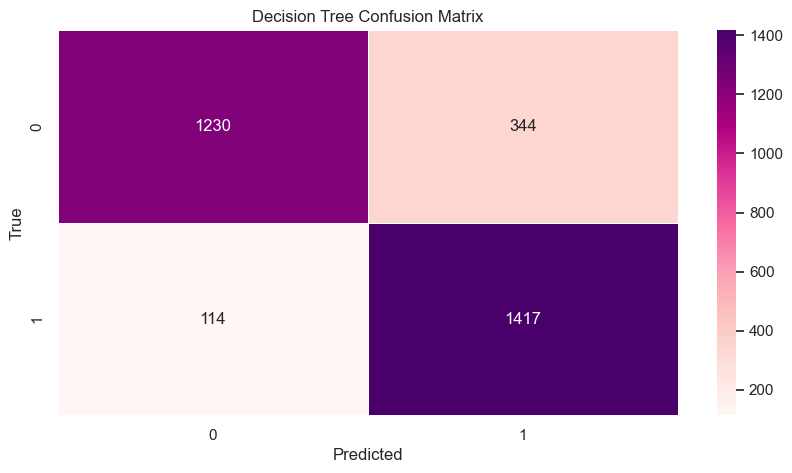

In [67]:
# Calculate the confusion matrix of the decision tree model
dt_cm = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix as a heatmap using Seaborn
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [68]:
# Round the evaluation metrics to 3 decimal places
dt_acc = round(dt_acc, 3)
dt_prec = round(dt_prec, 3)
dt_rec = round(dt_rec, 3)
dt_f1 = round(dt_f1, 3)
dt_f2 = round(dt_f2, 3)
dt_auc = round(dt_auc, 3)


# Create a results table
dt_results_table = [
    ["Decision Tree", dt_acc, dt_prec, dt_rec, dt_f1, dt_f2, dt_auc],
]

# Define column headers
dt_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(dt_results_table, headers=dt_headers))


Model            Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------  ----------  -----------  --------  ----------  ----------  -----
Decision Tree       0.852        0.805     0.926       0.861       0.899  0.853


## 2. Gradient Boosting model

### Create the Model

In [69]:
# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

### Train the Model

In [70]:
# Train the gradient boosting model on the training data
gb_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
gb_pred = gb_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [71]:
# Compute the evaluation metrics for the gradient boosting model
gb_acc = accuracy_score(y_test, gb_pred)
gb_prec = precision_score(y_test, gb_pred)
gb_rec = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_f2 = fbeta_score(y_test, dt_pred, beta=2)

# Compute the ROC curve and AUC score for the gradient boosting model
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_pred)
gb_auc = auc(gb_fpr, gb_tpr)

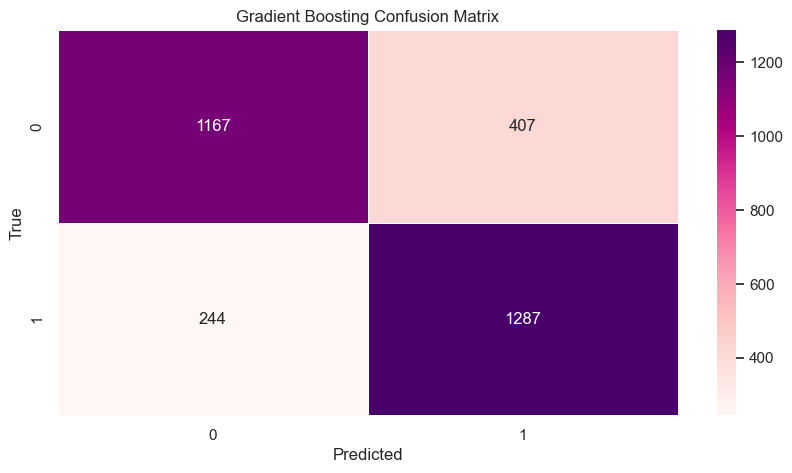

In [72]:
# Compute the confusion matrix for the gradient boosting model
gb_cm = confusion_matrix(y_test, gb_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(gb_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [73]:
# Round the evaluation metrics to 3 decimal places
gb_acc = round(gb_acc, 3)
gb_prec = round(gb_prec, 3)
gb_rec = round(gb_rec, 3)
gb_f1 = round(gb_f1, 3)
gb_f2 = round(gb_f2, 3)
gb_auc = round(gb_auc, 3)


# Create a results table
gb_results_table = [
    ["Gradient Boosting", gb_acc, gb_prec, gb_rec, gb_f1, gb_f2, gb_auc],
]

# Define column headers
gb_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(gb_results_table, headers=gb_headers))


Model                Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-----------------  ----------  -----------  --------  ----------  ----------  -----
Gradient Boosting        0.79         0.76     0.841       0.798       0.899  0.791


## 3. Logistic Regression

### Create the Model

In [74]:
# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

### Train the Model

In [75]:
# Fit the logistic regression model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data using the fitted model
lr_pred = lr_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [76]:
# Compute the valid metrics for the use case # Optional: show the classification report 
lr_acc = accuracy_score(y_test, lr_pred)  # calculate the accuracy score
lr_prec = precision_score(y_test, lr_pred)  # calculate the precision score
lr_rec = recall_score(y_test, lr_pred)  # calculate the recall score
lr_f1 = f1_score(y_test, lr_pred)  # calculate the F1 score
lr_f2 = fbeta_score(y_test, lr_pred, beta=2)  # calculate the F2 score (weighted towards recall)

# calculate the ROC curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)  
lr_auc = auc(lr_fpr, lr_tpr)  # calculate the area under the ROC curve

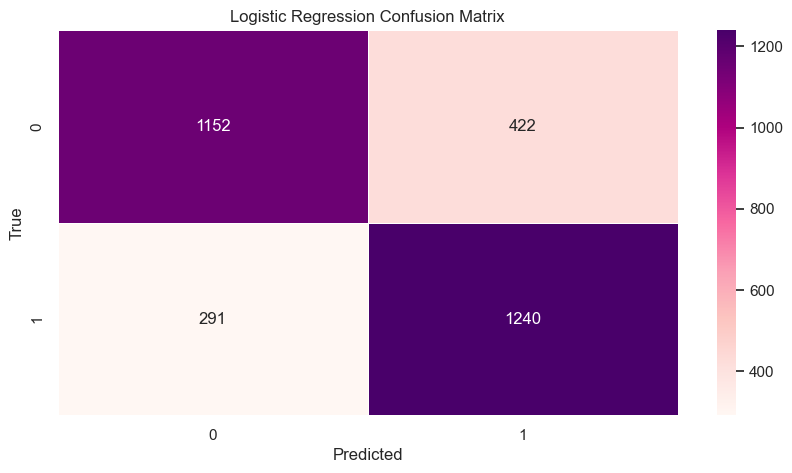

In [77]:
# Compute the confusion matrix for the logistic regression model
lr_cm = confusion_matrix(y_test, lr_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(lr_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [78]:
# Round the evaluation metrics to 3 decimal places
lr_acc = round(lr_acc, 3)
lr_prec = round(lr_prec, 3)
lr_rec = round(lr_rec, 3)
lr_f1 = round(lr_f1, 3)
lr_f2 = round(lr_f2, 3)
lr_auc = round(lr_auc, 3)


# Create a results table
lr_results_table = [
    ["Logistic Regression", lr_acc, lr_prec, lr_rec, lr_f1, lr_f2, lr_auc],
]

# Define column headers
lr_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(lr_results_table, headers=lr_headers))

Model                  Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------------  ----------  -----------  --------  ----------  ----------  -----
Logistic Regression        0.77        0.746      0.81       0.777       0.796  0.771


## 4. Stochastic Gradient Descent

### Create the Model

In [79]:
# Create a Stochastic Gradient Descent model
sgd_model = SGDClassifier(random_state=42)

### Train the Model

In [80]:
# Train the model on the training data
sgd_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
sgd_pred = sgd_model.predict(X_test)


### Evaluate the Model on the Evaluation dataset (Evalset)

In [81]:
# Calculate performance metrics for the stochastic gradient descent model
sgd_acc = accuracy_score(y_test, sgd_pred)       # Accuracy score
sgd_prec = precision_score(y_test, sgd_pred)     # Precision score
sgd_rec = recall_score(y_test, sgd_pred)         # Recall score
sgd_f1 = f1_score(y_test, sgd_pred)              # F1 score
sgd_f2 = fbeta_score(y_test, sgd_pred, beta=2)   # F2 score with beta=2

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_pred)
sgd_auc = auc(sgd_fpr, sgd_tpr)

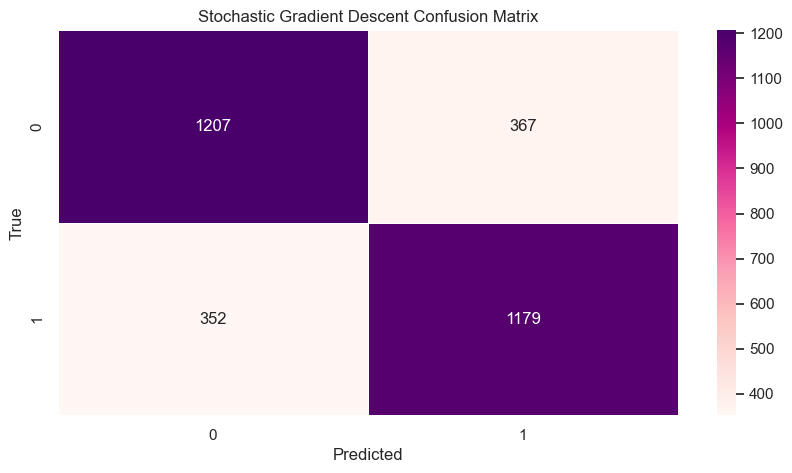

In [82]:
# Compute the confusion matrix for the stochastic gradient descent model
sgd_cm = confusion_matrix(y_test, sgd_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(sgd_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Stochastic Gradient Descent Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [83]:
# Round the evaluation metrics to 3 decimal places
sgd_acc = round(sgd_acc, 3)
sgd_prec = round(sgd_prec, 3)
sgd_rec = round(sgd_rec, 3)
sgd_f1 = round(sgd_f1, 3)
sgd_f2 = round(sgd_f2, 3)
sgd_auc = round(sgd_auc, 3)


# Create a results table
sgd_results_table = [
    ["Stochastic Gradient Descent", sgd_acc, sgd_prec, sgd_rec, sgd_f1, sgd_f2, sgd_auc],
]

# Define column headers
sgd_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(sgd_results_table, headers=sgd_headers))

Model                          Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
---------------------------  ----------  -----------  --------  ----------  ----------  -----
Stochastic Gradient Descent       0.768        0.763      0.77       0.766       0.769  0.768


## 5. K-Nearest Neighbours

### Create the Model

In [84]:
# Create a K-Nearest Neighbours model
knn_model = KNeighborsClassifier()

### Train the Model

In [85]:
# Train the model on the training data
knn_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
knn_pred = knn_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [86]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
knn_acc = round(accuracy_score(y_test, knn_pred), 3)
knn_prec = round(precision_score(y_test, knn_pred), 3)
knn_rec = round(recall_score(y_test, knn_pred), 3)
knn_f1 = round(f1_score(y_test, knn_pred), 3)
knn_f2 = round(fbeta_score(y_test, knn_pred, beta=2), 3)

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred)
knn_auc = round(auc(knn_fpr, knn_tpr), 3)

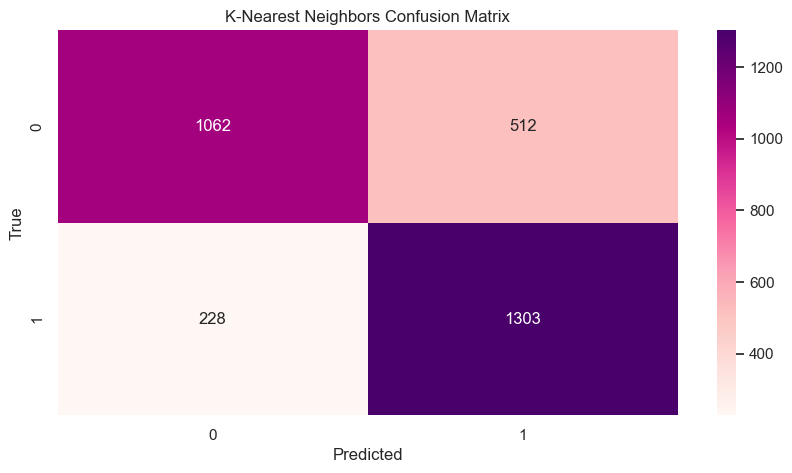

In [87]:
# Compute the confusion matrix for the K-Nearest Neighbours model
knn_cm = confusion_matrix(y_test, knn_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(knn_cm, annot=True, fmt=".0f", cmap='RdPu')

plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [88]:
# Round the evaluation metrics to 3 decimal places
knn_acc = round(knn_acc, 3)
knn_prec = round(knn_prec, 3)
knn_rec = round(knn_rec, 3)
knn_f1 = round(knn_f1, 3)
knn_f2 = round(knn_f2, 3)
knn_auc = round(knn_auc, 3)


# K-Nearest Neighbours
knn_results_table = [
    ["K-Nearest Neighbours", knn_acc, knn_prec, knn_rec, knn_f1, knn_f2, knn_auc],
]

# Define column headers
knn_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the K-Nearest Neighbours results table using tabulate
print(tabulate(knn_results_table, headers=knn_headers))

Model                   Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
--------------------  ----------  -----------  --------  ----------  ----------  -----
K-Nearest Neighbours       0.762        0.718     0.851       0.779       0.821  0.763


## 6. Random Forest Model

### Create the Model

In [89]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

### Train the Model

In [90]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
rf_pred = rf_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [91]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
rf_acc = round(accuracy_score(y_test, rf_pred), 3)
rf_prec = round(precision_score(y_test, rf_pred), 3)
rf_rec = round(recall_score(y_test, rf_pred), 3)
rf_f1 = round(f1_score(y_test, rf_pred), 3)
rf_f2 = round(fbeta_score(y_test, rf_pred, beta=2), 3)

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = round(auc(rf_fpr, rf_tpr), 3)

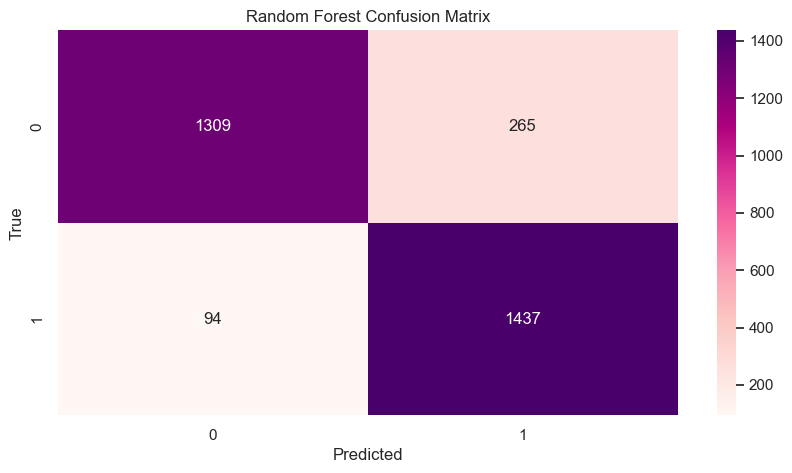

In [92]:
# compute the confusion matrix using true label values and predicted label values
rf_cm = confusion_matrix(y_test, rf_pred)

# plot the confusion matrix using seaborn heatmap with annotations and color map
sns.heatmap(rf_cm, annot=True, fmt=".0f", cmap='RdPu')


plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [93]:
# Round the evaluation metrics to 3 decimal places
rf_acc = round(rf_acc, 3)
rf_prec = round(rf_prec, 3)
rf_rec = round(rf_rec, 3)
rf_f1 = round(rf_f1, 3)
rf_f2 = round(rf_f2, 3)
rf_auc = round(rf_auc, 3)


# Random Forest Model
rf_results_table = [
    ["Random Forest Model", rf_acc, rf_prec, rf_rec, rf_f1, rf_f2, rf_auc],
]

# Define column headers
rf_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the Random Forest Model results table using tabulate
print(tabulate(rf_results_table, headers=rf_headers))

Model                  Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------------  ----------  -----------  --------  ----------  ----------  -----
Random Forest Model       0.884        0.844     0.939       0.889       0.918  0.885


## 7. Support Vector machines

### Create the Model

In [94]:
# Create a Support Vector machines model
svm_model = SVC()

### Train the Model

In [95]:
# Train the model on the training data
svm_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
svm_pred = svm_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [96]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
svm_acc = round(accuracy_score(y_test, svm_pred), 3)
svm_prec = round(precision_score(y_test, svm_pred), 3)
svm_rec = round(recall_score(y_test, svm_pred), 3)
svm_f1 = round(f1_score(y_test, svm_pred), 3)
svm_f2 = round(fbeta_score(y_test, svm_pred, beta=2), 3)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred)
svm_auc = round(auc(svm_fpr, svm_tpr), 3)


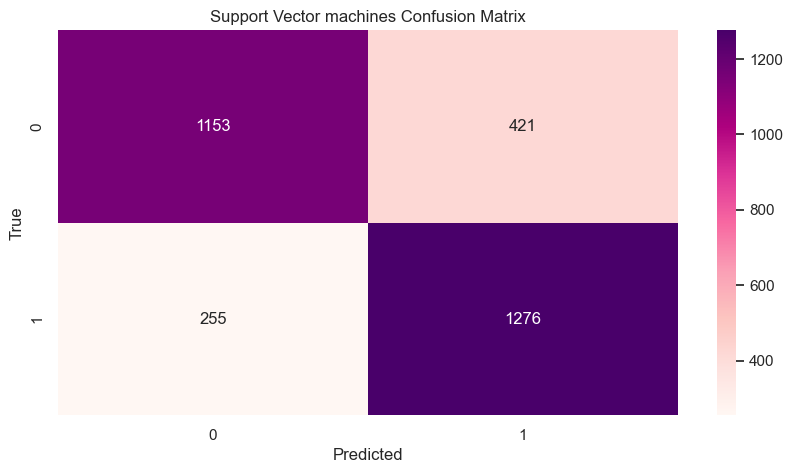

In [97]:
# compute the confusion matrix using true label values and predicted label values
svm_cm = confusion_matrix(y_test, svm_pred)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(svm_cm, annot=True, fmt=".0f", cmap='RdPu')

plt.title("Support Vector machines Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [98]:
# Round the evaluation metrics to 3 decimal places
svm_acc = round(svm_acc, 3)
svm_prec = round(svm_prec, 3)
svm_rec = round(svm_rec, 3)
svm_f1 = round(svm_f1, 3)
svm_f2 = round(svm_f2, 3)
svm_auc = round(svm_auc, 3)


# Support Vector Machines
svm_results_table = [
    ["Support Vector Machines", svm_acc, svm_prec, svm_rec, svm_f1, svm_f2, svm_auc],
]

# Define column headers
svm_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the Support Vector Machines results table using tabulate
print(tabulate(svm_results_table, headers=svm_headers))

Model                      Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-----------------------  ----------  -----------  --------  ----------  ----------  -----
Support Vector Machines       0.782        0.752     0.833       0.791       0.816  0.783


## Models comparison & Model Selection

In [99]:
# Create a table to compare the evaluation results
model_results_table = pd.DataFrame({'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 
                                        'Stochastic Gradient Descent', 
                                        'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines'],
                              'Accuracy': [dt_acc, gb_acc, lr_acc, sgd_acc, knn_acc, rf_acc, svm_acc],
                              'Precision': [dt_prec, gb_prec, lr_prec, sgd_prec, knn_prec, rf_prec, svm_prec],
                              'Recall': [dt_rec, gb_rec, lr_rec, sgd_rec, knn_rec, rf_rec, svm_rec],
                              'F1 Score': [dt_f1, gb_f1, lr_f1, sgd_f1, knn_f1, rf_f1, svm_f1],
                              'F2 Score': [dt_f2, gb_f2, lr_f2, sgd_f2, knn_f2, rf_f2, svm_f2],
                              'AUC': [dt_auc, gb_auc, lr_auc, sgd_auc, knn_auc, rf_auc, svm_auc]})


# Sort by Accuracy and F1_Score in descending order
sorted_table = model_results_table.sort_values(by=['Accuracy', 'F1 Score'], ascending=False)

sorted_table

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
5,Random Forest,0.884,0.844,0.939,0.889,0.918,0.885
0,Decision Tree,0.852,0.805,0.926,0.861,0.899,0.853
1,Gradient Boosting,0.790,0.760,0.841,0.798,0.899,0.791
6,Support Vector Machines,0.782,0.752,0.833,0.791,0.816,0.783
2,Logistic Regression,0.770,0.746,0.810,0.777,0.796,0.771
3,Stochastic Gradient Descent,0.768,0.763,0.770,0.766,0.769,0.768
4,K-Nearest Neighbours,0.762,0.718,0.851,0.779,0.821,0.763


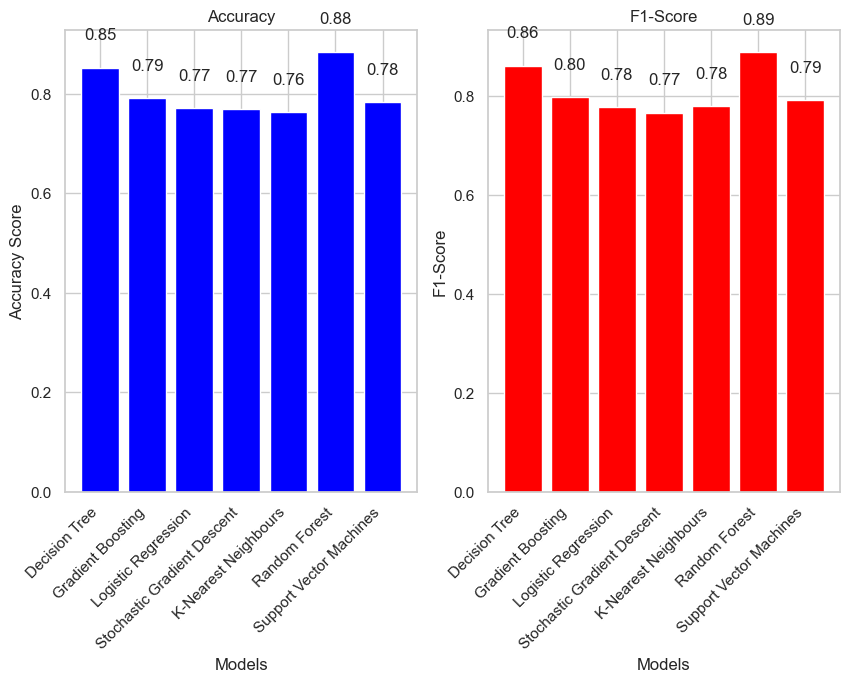

In [131]:
# Define the data for visualizing results
results_model_names = ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 'Stochastic Gradient Descent', 'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines']
Accuracy = [dt_acc, gb_acc, lr_acc, sgd_acc, knn_acc, rf_acc, svm_acc]
F1_Score = [dt_f1, gb_f1, lr_f1, sgd_f1, knn_f1, rf_f1, svm_f1]

# Set the figure size
plt.figure(figsize=(10,6))

# Create a bar chart for Accuracy
plt.subplot(1,2,1)
bars = plt.bar(results_model_names, Accuracy, color='blue')
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45, ha='right')

# Add data labels to the Accuracy bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f"{Accuracy[i]:.2f}", ha='center', va='bottom')

# Create a bar chart for F1-Score
plt.subplot(1,2,2)
bars = plt.bar(results_model_names, F1_Score, color='red')
plt.title('F1-Score')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')

# Add data labels to the F1-Score bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f"{F1_Score[i]:.2f}", ha='center', va='bottom')

# Show the plot
plt.show()


**Comment**:


We can see from the Accuracy and F1 score that the **Random Forest** had the highest Score. So we'll pick that, tune the hyperparameters, and retrain it with the best parameters for the best results.

## Cross Validation for all Models

### 1. Decision Tree model

In [100]:
# Set the number of folds for cross-validation
dt_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=dt_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
dt_cv_score_mean = np.mean(score)
dt_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(dt_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(dt_cv_score_std))

Cross-validation f1 scores: [0.85122411 0.83496412 0.85387548 0.85126162 0.83516484]
Average f1 score for all folds: 0.845
Standard deviation of f1 scores: 0.008


### 2. Gradient Boosting model

In [101]:
# Set the number of folds for cross-validation
gb_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=gb_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
gb_cv_score_mean = np.mean(score)
gb_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(gb_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(gb_cv_score_std))

Cross-validation f1 scores: [0.79662118 0.78671096 0.79198966 0.79041916 0.78023407]
Average f1 score for all folds: 0.789
Standard deviation of f1 scores: 0.005


### 3. Logistic regresion

In [102]:
# Set the number of folds for cross-validation
lr_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=lr_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
lr_cv_score_mean = np.mean(score)
lr_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(lr_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(lr_cv_score_std))


Cross-validation f1 scores: [0.78153446 0.77077748 0.77623762 0.76761027 0.76041667]
Average f1 score for all folds: 0.771
Standard deviation of f1 scores: 0.007


### 4. Stochastic Gradient Descent

In [103]:
# Set the number of folds for cross-validation
sgd_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=sgd_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(sgd_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
sgd_cv_score_mean = np.mean(score)
sgd_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(sgd_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(sgd_cv_score_std))


Cross-validation f1 scores: [0.78887628 0.76967593 0.77093426 0.75866757 0.75360419]
Average f1 score for all folds: 0.768
Standard deviation of f1 scores: 0.012


### 5. K-Nearest Neighbours

In [104]:
# Set the number of folds for cross-validation
knn_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=knn_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
knn_cv_score_mean = np.mean(score)
knn_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(knn_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(knn_cv_score_std))


Cross-validation f1 scores: [0.76717325 0.75944584 0.76496534 0.75405581 0.75062972]
Average f1 score for all folds: 0.759
Standard deviation of f1 scores: 0.006


### 6. Random Forest Model

In [105]:
# Set the number of folds for cross-validation
rf_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=rf_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
rf_cv_score_mean = np.mean(score)
rf_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(rf_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(rf_cv_score_std))


Cross-validation f1 scores: [0.88030888 0.87128713 0.88617363 0.87193099 0.86611147]
Average f1 score for all folds: 0.875
Standard deviation of f1 scores: 0.007


### 7. Support Vector machines

In [106]:
# Set the number of folds for cross-validation
svm_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=svm_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
svm_cv_score_mean = np.mean(score)
svm_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(svm_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(svm_cv_score_std))


Cross-validation f1 scores: [0.781491   0.77347341 0.79375407 0.77077748 0.76943174]
Average f1 score for all folds: 0.778
Standard deviation of f1 scores: 0.009


In [107]:
# Create a table to compare the evaluation results
cv_results_table = pd.DataFrame({'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 
                                        'Stochastic Gradient Descent', 
                                        'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines'],
                              'Average Cross Validation F1 Scores': [dt_cv_score_mean, 
                                                                     gb_cv_score_mean, 
                                                                     lr_cv_score_mean, 
                                                                     sgd_cv_score_mean, 
                                                                     knn_cv_score_mean, 
                                                                     rf_cv_score_mean, 
                                                                     svm_cv_score_mean],
                              'Standard Deviation for Cross Validation': [dt_cv_score_std, 
                                                                          gb_cv_score_std, 
                                                                          lr_cv_score_std, 
                                                                          sgd_cv_score_std, 
                                                                          knn_cv_score_std, 
                                                                          rf_cv_score_std, 
                                                                          svm_cv_score_std]})


# Sort by Accuracy and F1_Score in descending order
sorted_cv_table = cv_results_table.sort_values(by=['Average Cross Validation F1 Scores',], ascending=False)

sorted_cv_table

,Model,Average Cross Validation F1 Scores,Standard Deviation for Cross Validation
5,Random Forest,0.875162,0.007143
0,Decision Tree,0.845298,0.008411
1,Gradient Boosting,0.789195,0.005494
6,Support Vector Machines,0.777786,0.009014
2,Logistic Regression,0.771315,0.007231
3,Stochastic Gradient Descent,0.768352,0.012173
4,K-Nearest Neighbours,0.759254,0.006273


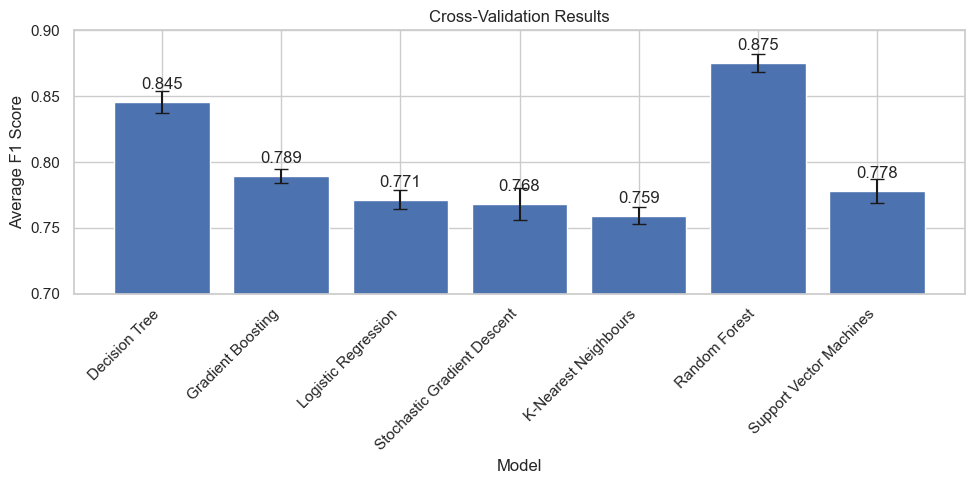

In [111]:
# define the data for visualizing results
model_names = ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 'Stochastic Gradient Descent', 'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines']
f1_scores = [dt_cv_score_mean, gb_cv_score_mean, lr_cv_score_mean, sgd_cv_score_mean, knn_cv_score_mean, rf_cv_score_mean, svm_cv_score_mean]
std_devs = [dt_cv_score_std, gb_cv_score_std, lr_cv_score_std, sgd_cv_score_std, knn_cv_score_std, rf_cv_score_std, svm_cv_score_std]

# create the bar chart

fig, ax = plt.subplots()
ax.bar(model_names, f1_scores, yerr=std_devs, capsize=5)

# Add data labels to the bars
for i, score in enumerate(f1_scores):
    ax.text(i, score + 0.01, '{:.3f}'.format(score), ha='center')

ax.set_xlabel('Model')
ax.set_ylabel('Average F1 Score')
ax.set_ylim([0.7, 0.9])
ax.set_title('Cross-Validation Results')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Comment**:
    
After the K Fold cross validation scores, the average cross validation F1 scores depicts the **Random Forest Model** is the best model.

Cross Validation was the to assess our models by training several models on various subsets of the input data. It is also used as a technique to identify over fitting in the models. This indicates that the model is not successfully generalizing the patterns and similarities in the new inputted data.

# 

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

### Hyperparameters tuning - Random Forest  (Best Model)

In [108]:
# Define the model
rfc = RandomForestClassifier(random_state=42)

In [109]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [110]:
# Define the search strategy and perform the search
rfc_p = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
rfc_p.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [112]:
# Print the best hyperparameters and their corresponding score
best_params = rfc_p.best_params_
best_score = round(rfc_p.best_score_, 3)
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best score: 0.791


In [113]:
# Evaluate the model on the testing set using the best hyperparameters
best_rfc = rfc_p.best_estimator_
test_score = round(best_rfc.score(X_test, y_test), 3)
print(f"Test score: {test_score}")

Test score: 0.796


In [114]:
def display(results):
    print("Best parameters are: ", results.best_params_)
    print("\n")
    
    mean_scores = results.cv_results_['mean_test_score']
    std_scores = results.cv_results_['std_test_score']
    param_sets = results.cv_results_['params']
    
    for mean_score, std_score, param_set in zip(mean_scores, std_scores, param_sets):
        print(f"{round(mean_score, 3)} (+/- {round(std_score * 2, 3)}) for {param_set}")

In [115]:
# display the results
display(rfc_p)

Best parameters are:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


0.753 (+/- 0.031) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.755 (+/- 0.031) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.754 (+/- 0.033) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
0.753 (+/- 0.031) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.755 (+/- 0.031) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
0.754 (+/- 0.033) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
0.753 (+/- 0.031) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.755 (+/- 0.031) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
0.754 (+/- 0.033) for {'max_dep

### Hyperparameters tuning - Decision Tree  (2nd Best Model)

In [116]:
# Define parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [117]:
# Initialize decision tree classifier
dtc = DecisionTreeClassifier()

In [118]:
# Initialize grid search
dtc_p = GridSearchCV(estimator = dtc, param_grid = dt_param_grid, cv = 5)

# Fit grid search to data
dtc_p.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [119]:
# Print best parameters and score
print("Best parameters: {}".format(dtc_p.best_params_))
print(f"Best score: {round(dtc_p.best_score_, 3)}")

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.84


### Hyperparameters tuning - Gradient Boosting (3rd Best Model)

In [120]:
# Define the model
gbc = GradientBoostingRegressor()

In [121]:
# Define the hyperparameters to be tuned
gb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.5, 0.7, 1.0],
    'min_samples_leaf': [1, 2, 4]
}

In [122]:
# Use GridSearchCV to find the best hyperparameters
gbc_p = GridSearchCV(gbc, gb_params, cv=5, n_jobs=-1)
gbc_p.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1.0]})

In [123]:
# Print the best hyperparameters found
print(gbc_p.best_params_)
print(f"Best score: {round(gbc_p.best_score_, 3)}")

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 200, 'subsample': 0.7}
Best score: 0.533


## Conclusion

This project provides a detailed analysis of customer churn prediction and retention strategies for a telecommunication company.Among the models analysed it can be inferred that Random Forest Model accurately predicts churn outcome of customers. Specifically, the model gives an average cross validation of approximately 87% from the K-Fold Cross Validation done.  

### Key Insights

- Feature engineering and selection are critical steps in machine learning projects and can greatly affect model performance.


- Choosing the right machine learning algorithm and tuning hyperparameters can significantly improve model accuracy.


- Preprocessing steps like scaling and encoding categorical variables are essential for many machine learning models.


- Handling class imbalance is an important consideration for classification tasks, as it can affect model performance and bias the results.


- Interpreting model results and evaluating performance metrics are key steps in assessing the effectiveness of a model and its suitability for real-world applications.


- There can be challenges in working with real-world datasets, such as missing or incomplete data, outliers, and other issues that require careful consideration and handling.


- Machine learning can have significant real-world applications, such as predicting customer behavior or fraud detection, and can provide valuable insights for decision-making.


### Challenges

- **Dealing with imbalanced data**: The dataset had more samples for one class than the other, which can make it difficult for the model to learn the minority class. Various techniques were used to handle this issue, such as upsampling, downsampling, and using class weights.


- **Feature engineering**: Feature engineering is an important aspect of any machine learning project, and it can be challenging to determine which features to use and how to transform them to improve model performance.


- **Hyperparameter tuning**: Finding the optimal set of hyperparameters for a machine learning model can be a time-consuming and iterative process. Grid search and cross-validation were used in this project to find the best hyperparameters.


- **Model Evaluation**: The analysis used a single evaluation metric (accuracy) to evaluate the performance of the model. It is important to evaluate the model using multiple metrics (such as precision, recall, and F1-score) to get a more comprehensive view of its performance. It was challenging to establish the fact the evaluation metric is the only best method for our analysis prediction.


- **Retention Strategies**: Because the analysis or insight was drawn for a single dataset, it was challenging to provide detailed recommendations for retention strategies to reduce customer churn. However, it would  be beneficial to explore and recommend specific retention strategies that the teleco company to implement to reduce churn.


### Way Forward

- **Collect more data**: The dataset used in this project is relatively small, and collecting more data could improve the model's performance and make it more robust.


- **Feature engineering**: More feature engineering could be done to create new features that may improve the model's performance. For example, adding interaction terms or polynomial terms to existing features, or creating new features based on domain knowledge.


- **Hyperparameter tuning**: There is still room for improvement in the model's performance by further optimizing the hyperparameters of the Gradient Boosting Classifier.


- **Deploy the model**: After the model is finalized, it can be deployed in a production environment, for example, as a web application or integrated into a larger software system.


- **Monitor and update the model**: Once the model is deployed, it is important to monitor its performance and update it regularly with new data to ensure it remains accurate and effective.


- **Data Cleaning and Feature Engineering**: Data cleaning and feature engineering are crucial steps in any data analysis project. However, the analysis performed feature selection using the Random Forest feature importance method, but it is important to try other feature selection methods as well to ensure the most important features are selected for the model.
